In [1]:
import warnings
warnings.filterwarnings('ignore')

#### Uji Normalitas

##### Menguji Apakah Dua Kelompok Memiliki Rata-Rata yang Berbeda Secara Signifikan

In [2]:
from statsmodels.stats.weightstats import ttest_ind
import numpy as np

group1 = np.random.normal(50,10,30)
group2 = np.random.normal(55,10,30)

t_stat, p_value, df=ttest_ind(group1, group2)
print(f'T-Statistik: {t_stat:.3f}, p-value: {p_value:.3f}')
if p_value>0.05:
    print('Terima Hipotesis Nol')
else:
    print('Tolak Hipotesis Nol')

T-Statistik: -2.014, p-value: 0.049
Tolak Hipotesis Nol


##### Uji Normalitas

In [3]:
from statsmodels.stats.diagnostic import normal_ad

data=np.random.normal(0,1,100)

stat,p_value=normal_ad(data)
print(f'Statistic: {stat:.3f}, p-value: {p_value:.3f}')

alpha = 0.05
if p_value > alpha:
    print("Tidak cukup bukti untuk menolak H0: Data berdistribusi normal.")
else:
    print("Tolak H0: Data tidak berdistribusi normal.")

Statistic: 0.394, p-value: 0.369
Tidak cukup bukti untuk menolak H0: Data berdistribusi normal.


In [4]:
import numpy as np
from scipy import stats

data = np.random.normal(0, 1, 100)

stat, p_value = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data, ddof=1)))

print(f'Statistic: {stat:.3f}, p-value: {p_value:.3f}')

alpha = 0.05
if p_value > alpha:
    print("Tidak cukup bukti untuk menolak H0: Data berdistribusi normal.")
else:
    print("Tolak H0: Data tidak berdistribusi normal.")

Statistic: 0.053, p-value: 0.922
Tidak cukup bukti untuk menolak H0: Data berdistribusi normal.


#### Latihan Soal

##### Soal No. 1

Regresi Linear
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     6277.
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           1.53e-52
Time:                        08:45:21   Log-Likelihood:                -75.989
No. Observations:                  50   AIC:                             156.0
Df Residuals:                      48   BIC:                             159.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -87.5599      1.838    -

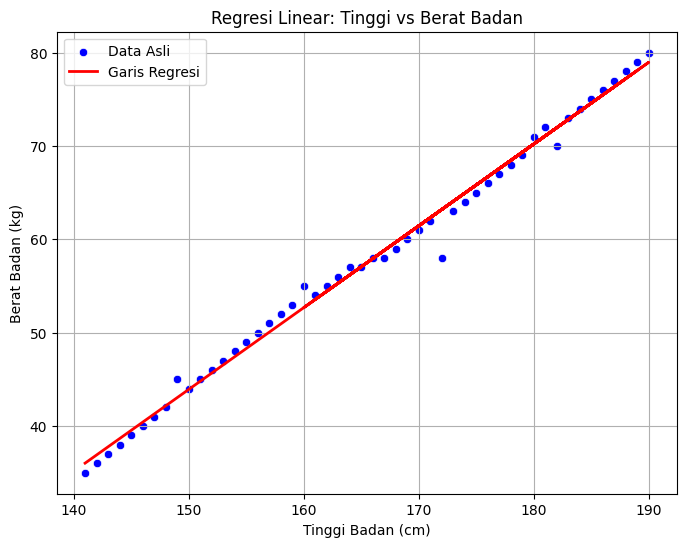

In [5]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Data tinggi badan (X) dan berat badan (Y)
X = np.array([172, 181, 178, 160, 185, 176, 182, 169, 180, 175, 177, 183, 174, 168, 179, 184, 186, 170, 171,
              173, 161, 187, 165, 162, 188, 166, 189, 163, 164, 167, 190, 159, 158, 157, 156, 155, 154, 153, 152,
              151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141])

y = np.array([58, 72, 68, 55, 75, 66, 70, 60, 71, 65, 67, 73, 64, 59, 69, 74, 76, 61, 62, 63, 54, 77 ,57, 55, 78, 58,
              79, 56, 57, 58, 80, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 45, 42, 41, 40, 39, 38, 37, 36, 35])

X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

print("Regresi Linear")
print(model.summary())

y_pred = model.predict(X_const)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X, y=y, color='blue', label="Data Asli")
plt.plot(X, y_pred, color='red', linewidth=2, label="Garis Regresi")

plt.xlabel("Tinggi Badan (cm)")
plt.ylabel("Berat Badan (kg)")
plt.title("Regresi Linear: Tinggi vs Berat Badan")
plt.legend()
plt.grid(True)

##### Soal No. 2

         Current function value: 0.000000
         Iterations: 35


C:\Users\Ryzen\AppData\Roaming\Python\Python313\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


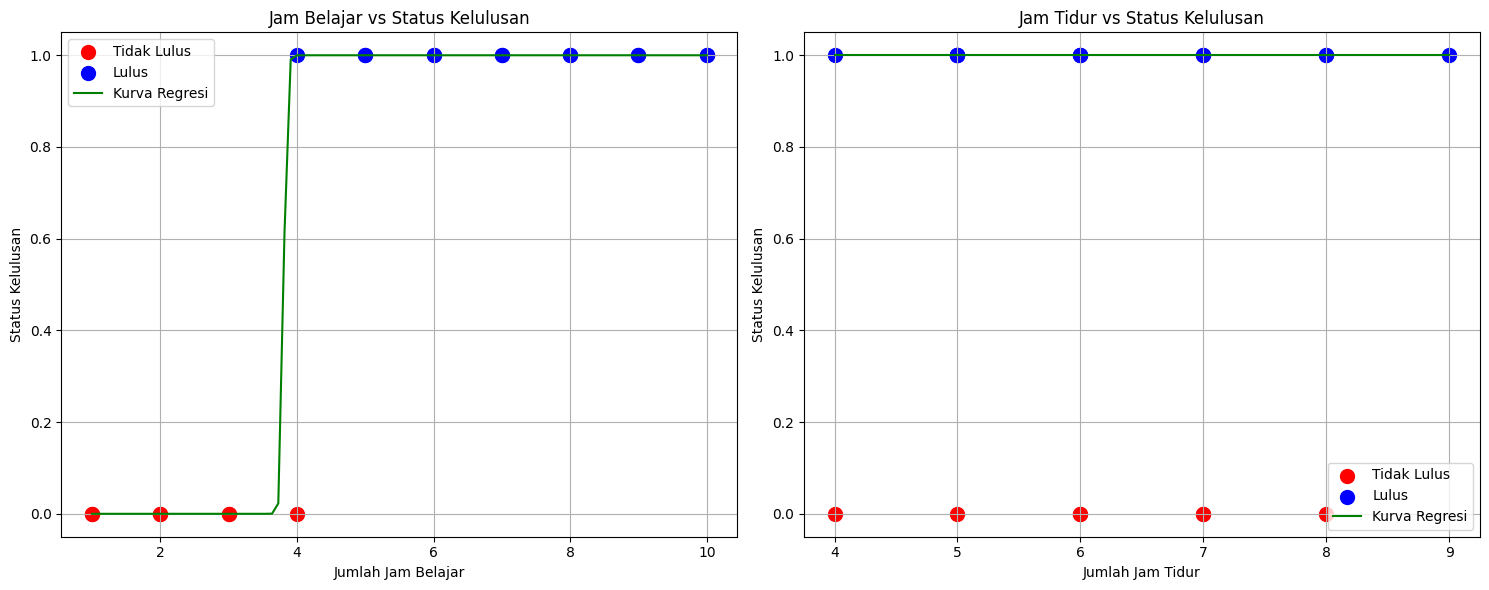

In [6]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

X1 = np.array([2, 4, 6, 8, 3, 7, 5, 9, 1, 10, 3, 6, 2, 8, 4, 7, 5, 9, 1, 10])
X2 = np.array([6, 7, 5, 6, 8, 5, 9, 4, 7, 6, 5, 8, 6, 7, 4, 5, 8, 6, 7, 5])
y = np.array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1])

X = np.column_stack((X1, X2))
X_const = sm.add_constant(X)
model = sm.Logit(y, X_const).fit()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.scatter(X1[y==0], y[y==0], color='red', s=100, label='Tidak Lulus')
ax1.scatter(X1[y==1], y[y==1], color='blue', s=100, label='Lulus')

ax1.set_xlabel("Jumlah Jam Belajar")
ax1.set_ylabel("Status Kelulusan")
ax1.set_title("Jam Belajar vs Status Kelulusan")
ax1.grid(True)

X1_range = np.linspace(X1.min(), X1.max(), 100)
X_pred = np.column_stack([np.ones(100), X1_range, np.full(100, np.mean(X2))])
y_pred = model.predict(X_pred)
ax1.plot(X1_range, y_pred, 'g-', label='Kurva Regresi')
ax1.legend()

ax2.scatter(X2[y==0], y[y==0], color='red', s=100, label='Tidak Lulus')
ax2.scatter(X2[y==1], y[y==1], color='blue', s=100, label='Lulus')

ax2.set_xlabel("Jumlah Jam Tidur")
ax2.set_ylabel("Status Kelulusan")
ax2.set_title("Jam Tidur vs Status Kelulusan")
ax2.grid(True)

X2_range = np.linspace(X2.min(), X2.max(), 100)
X_pred = np.column_stack([np.ones(100), np.full(100, np.mean(X1)), X2_range])
y_pred = model.predict(X_pred)
ax2.plot(X2_range, y_pred, 'g-', label='Kurva Regresi')
ax2.legend()
plt.tight_layout()
plt.show()

##### Soal No. 3

In [ ]:
kelas_A = np.array([70, 75, 80, 85, 90, 72, 78, 82, 88, 76, 79, 81, 84, 77, 74, 86, 83, 87, 89, 71, 73, 78, 80, 82, 85, 88, 90, 76, 79, 84])
kelas_B = np.array([74, 77, 79, 85, 83, 81, 86, 82, 89, 75, 76, 78, 80, 84, 88, 90, 92, 77, 79, 85, 87, 89, 91, 73, 75, 79, 82, 84, 86, 88])

t_stat, p_value = stats.ttest_ind(kelas_A, kelas_B, equal_var=False)
print("\nUji t Dua Sampel:")
print(f"T-Statistic: {t_stat:.3f}, p-value: {p_value:.3f}")
if p_value < 0.05:
    print("Tolak H0: Terdapat perbedaan signifikan antara dua kelas.")
else:
    print("Tidak cukup bukti untuk menolak H0: Tidak ada perbedaan signifikan.")


Uji t Dua Sampel:
T-Statistic: -1.188, p-value: 0.240
Tidak cukup bukti untuk menolak H0: Tidak ada perbedaan signifikan.


##### Soal No. 4

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

pelanggan = [120, 130, 125, 140, 135, 150, 145, 155, 160, 158, 162, 170, 165, 175, 180, 178, 185, 190, 195, 200]
data_series = pd.Series(pelanggan)

model_arima = ARIMA(data_series, order=(2, 1, 2))
arima_fit = model_arima.fit()
print("\nModel ARIMA:\n", arima_fit.summary())


Model ARIMA:
                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -54.046
Date:                Thu, 13 Feb 2025   AIC                            118.091
Time:                        08:36:08   BIC                            122.813
Sample:                             0   HQIC                           118.890
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3918      0.305      1.285      0.199      -0.206       0.989
ar.L2          0.5797      0.297      1.953      0.051      -0.002       1.161
ma.L1         -1.2985      0.543     

### Numpy and Pandas

#### Numpy

###### NumPy merupakan sebuah library open-source Python dapat digunakan untuk melakukan komputasi numerik dan saintifik. Numpy merupakan akronim dari Numerical Python, dan mendukung berbagai macam operasi komputasi matematis, seperti aljabar linear, geometri, dan sebagainya.

##### Membuat atau Mendefinisikan Array

In [ ]:
import numpy as np

In [ ]:
arr1=np.array([[1,2],[3,4]])
arr1

array([[1, 2],
       [3, 4]])

In [ ]:
arr2=np.array(['a','b','c'])
arr2

array(['a', 'b', 'c'], dtype='<U1')

In [ ]:
arr3=np.arange(3,7,dtype=int)
arr3

array([3, 4, 5, 6])

In [ ]:
arr4=np.arange(3,7,2,dtype=float)
arr4

array([3., 5.])

In [ ]:
arr5=np.zeros(5,dtype=int)
arr5

array([0, 0, 0, 0, 0])

In [ ]:
arr6=np.ones(5,dtype=int)
arr6

array([1, 1, 1, 1, 1])

##### Manipulasi NumPy Array

In [ ]:
arr=np.arange(1,9)
arr

array([1, 2, 3, 4, 5, 6, 7, 8])

###### Reshape: Memberikan bentuk baru ke NumPy Array tanpa mengubah data

In [ ]:
arr2=arr.reshape(2,4)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

###### Flatten: Menampilkan array sebagai Single Dimension Array (1-D)

In [ ]:
arr3=arr2.flatten()
arr3

array([1, 2, 3, 4, 5, 6, 7, 8])

###### Transpose: transpose

In [ ]:
arr2.transpose()

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])

###### Concatenate: Menggabungkan dua atau lebih NumPy array dengan bentuk yang sama sepanjang axis yang sudah ada

In [ ]:
arr1=np.array([[1,2,3],[4,5,6],[7,8,9]])
arr2=np.array([[20,21,22],[23,24,25],[26,27,28]])
print(f'Array 1:\n {arr1}\n\n Array 2:\n {arr2}')

Array 1:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

 Array 2:
 [[20 21 22]
 [23 24 25]
 [26 27 28]]


In [ ]:
np.concatenate([arr1,arr2],axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [20, 21, 22],
       [23, 24, 25],
       [26, 27, 28]])

In [ ]:
np.concatenate([arr1,arr2],axis=1)

array([[ 1,  2,  3, 20, 21, 22],
       [ 4,  5,  6, 23, 24, 25],
       [ 7,  8,  9, 26, 27, 28]])

###### Stack: Menggabungkan sequence NumPy array di sepanjang axis yang baru

In [ ]:
np.stack([arr1,arr2],axis=0)

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]],

       [[20, 21, 22],
        [23, 24, 25],
        [26, 27, 28]]])

In [ ]:
np.stack([arr1,arr2],axis=1)

array([[[ 1,  2,  3],
        [20, 21, 22]],

       [[ 4,  5,  6],
        [23, 24, 25]],

       [[ 7,  8,  9],
        [26, 27, 28]]])

###### Split: membagi 1-D NumPy array menjadi sejumlah subarray

In [ ]:
arr=np.arange(9)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
np.split(arr,3)

[array([0, 1, 2]), array([3, 4, 5]), array([6, 7, 8])]

###### Resize: mengubah NumPy array dengan ukuran yang ditentukan. Note: Jika ukuran baru lebih besar dari ukuran asli maka array akan diisi dengan salinan nilai-nilai sebelumnya

In [ ]:
arr=np.array([[1,2,3],[4,5,6]])
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
np.resize(arr,(3,3))

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3]])

In [ ]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

###### Append: Menambahkan nilai/value di akhir NumPy Array

In [ ]:
np.append(arr,np.array([[7,8,9]]),axis=0)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

###### Insert: Menyisipkan nilai/value dalam NumPy array dengan input di sepanjang axis yang diberikan dan sebelum indeks yang diberikan

In [ ]:
arr=np.array([[1,2],[3,4],[5,6]])
arr=np.insert(arr,2,np.array([[11,12]]),axis=0)
arr

array([[ 1,  2],
       [ 3,  4],
       [11, 12],
       [ 5,  6]])

###### Delete: Menghapus nilai/value dalam NumPy array input di sepanjang axis yang diberikan dan sebelum indeks yang diberikan

In [ ]:
arr=np.arange(1,9).reshape(2,4)
arr

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [ ]:
np.delete(arr,0,axis=0)

array([[5, 6, 7, 8]])

###### Unique: Mencari elemen unik

In [ ]:
arr=np.array([5,2,6,2,7,5,6,8,2,4,9,2,2])
arr

array([5, 2, 6, 2, 7, 5, 6, 8, 2, 4, 9, 2, 2])

In [ ]:
np.unique(arr)

array([2, 4, 5, 6, 7, 8, 9])

###### Slicing: Mengambil elemen dari satu indeks yang diberikan ke indeks lain.

In [ ]:
arr=np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
arr[2:7:2]

array([2, 4, 6])

##### Fungsi Statistika Dasar

In [ ]:
a=np.array([[1,2],[3,4]])
o1=np.mean(a)
o1

np.float64(2.5)

In [ ]:
o2=np.mean(a,axis=0)
o2

array([2., 3.])

In [ ]:
o3=np.mean(a,axis=1)
o3

array([1.5, 3.5])

In [ ]:
b=np.arange(1,9)
b

array([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
np.median(b)

np.float64(4.5)

In [ ]:
c=np.array([1,2,2,5,4,2,5,6,7])

In [ ]:
from scipy import stats
stats.mode(c)

ModeResult(mode=np.int64(2), count=np.int64(3))

In [ ]:
np.max(c)

np.int64(7)

In [ ]:
np.min(c)

np.int64(1)

#### Pandas

###### Pandas merupakan sebuah library open-source Python berlisensi BSD (Berkeley Software Distribution) yang mendukung struktur dan analisis data yang mudah digunakan serta berkinerja tinggi.

In [ ]:
import pandas as pd

##### Series

In [ ]:
data=pd.Series([2,3,5])
data

0    2
1    3
2    5
dtype: int64

###### Membuat Series dari data berupa NumPy Array

In [ ]:
array=np.array([2,3,5])
data=pd.Series(array)
data

0    2
1    3
2    5
dtype: int64

###### Modifikasi Indeks

In [ ]:
data=pd.Series(['Berwyn',1129,True],index=['a','b','c'])
data

a    Berwyn
b      1129
c      True
dtype: object

In [ ]:
data['a']

'Berwyn'

In [ ]:
data=pd.Series([2,3,5])
data[2]

np.int64(5)

##### Data Frame

###### DataFrame dengan tipe data Dictionary

In [ ]:
data={
    'calories': [420, 380, 390],
    'duration': [50, 40, 45]
}

df=pd.DataFrame(data)
df

,calories,duration
0,420,50
1,380,40
2,390,45


###### DataFrame dengan tipe data berupa List

In [ ]:
data=[[420, 50],
      [380, 40],
      [390, 45]]

df=pd.DataFrame(data, columns=['calories', 'duration'])
df

,calories,duration
0,420,50
1,380,40
2,390,45


##### Read File

In [ ]:
df_1=pd.read_excel('Data/sales_dataset.xlsx')
df_1

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,Paid Date,Order Number,First Name,Last Name,Meta Category,Product Name,Transaction Amount,Seller Discount,Sales Discount,Delivery Fee,Other Discount
1,NaN,20170724,201707240088517,elvride,aries,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,153000,10200,9000,0
2,NaN,20170701,201707018889790,BASIR,Ninuk,Service/ Mokado,Pulsa BOLT 150.000,287800,68000,0,0,0
3,NaN,20170707,201707079264675,Citra,Ardi,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000,0,700,0,0
4,NaN,20170720,201707209945714,Dian,Renaldi,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000,0,5900,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11996,NaN,20171201,201712012704898,Fitrah,gina,Service/ Mokado,"Xtra Combo 12GB, 30hr",333000,300000,2300,0,0
11997,NaN,20171203,201712032723513,Djebeng,Shinta,Service/ Mokado,"Xtra Combo 12GB, 30hr",280000,222500,0,0,0
11998,NaN,20171204,201712042740205,Amik,Elan,Home/ Food,Kreta - Kripik Tempe Indonesia - Rasa Jomblo d...,150000,81000,4800,0,0
11999,NaN,20171207,201712072778621,Anna,asih,Gadget/ Komputer,Samsung Galaxy J5 Pro Garansi Resmi Special Price,475000,400000,0,0,0


In [ ]:
df_2=pd.read_csv('Data/ecommerce_dataset.csv')
df_2

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
0,AU-2015-1,2015-11-09,2015-11-17,8.0,First Class,Auto & Accessories,Car Media Players,$140.00,2,0.05,...,$4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,2015-06-30,2015-07-02,2.0,First Class,Auto & Accessories,Car Speakers,$211.00,3,0.03,...,$11.20,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,2015-12-05,2015-12-13,8.0,First Class,Auto & Accessories,Car Body Covers,$117.00,5,0.01,...,$3.10,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,2015-05-09,2015-05-16,7.0,First Class,Auto & Accessories,Car & Bike Care,$118.00,2,0.05,...,$2.60,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,2015-07-09,2015-07-18,9.0,First Class,Auto & Accessories,Tyre,$250.00,1,0.04,...,$16.00,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51298,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51299,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51300,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51301,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
